In [1]:
import sys
sys.path.append('C:/Users/myese/AppData/Local/Programs/Python/Python37/Lib/site-packages')
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

In [4]:
# print(tf.__version__)
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [2]:
(og_train_images, og_train_labels), (og_test_images, og_test_labels) = tf.keras.datasets.mnist.load_data(path="mnist.npz")

og_class_names = ['0', '1', '2', '3', '4','5', '6', '7', '8', '9']

11493376/11490434 [==============================] - 18s 2us/step


In [3]:
print(og_train_images.shape)
print(og_train_labels.shape)
print(og_test_images.shape)
print(og_test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [89]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
print(class_names[train_labels[0]])
print(train_images[0])

In [ ]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [7]:
og_train_images_pp = og_train_images / 255.0

og_test_images_pp = og_test_images / 255.0


In [5]:
# preprocessing means scaling down to 0 to 1 range for neural network usage
train_images_pp = train_images / 255.0

test_images_pp = test_images / 255.0

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images_pp[i+25], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i+25]])
plt.show()

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.fit(train_images_pp, train_labels, epochs=10, verbose=0)

print('\n')
test_loss, test_acc = model.evaluate(test_images_pp,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)



313/313 - 1s - loss: 0.3586 - accuracy: 0.8719

Test accuracy: 0.8719000220298767


In [11]:
og_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])
og_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
og_model.fit(og_train_images_pp, og_train_labels, epochs=10, verbose=0)

print('\n')
test_loss, test_acc = og_model.evaluate(og_test_images_pp,  og_test_labels, verbose=2)

print('\nTest accuracy:', test_acc)



313/313 - 0s - loss: 0.0864 - accuracy: 0.9774

Test accuracy: 0.977400004863739


In [18]:
def plot_image(i, predictions_array, true_label, img, class_names):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


In [16]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images_pp)

In [7]:
predictions.shape

(10000, 10)

In [8]:
predictions[6234]

array([3.1797327e-03, 1.9407566e-05, 1.6320614e-02, 2.3354504e-02,
       5.8578461e-01, 3.2625977e-08, 3.7074986e-01, 3.0821125e-06,
       5.8761891e-04, 5.5369907e-07], dtype=float32)

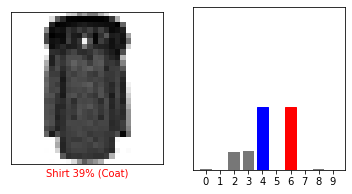

In [20]:
# print(class_names[test_labels[6234]])
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(6234, predictions[6234], test_labels, test_images, class_names)
plt.subplot(1,2,2)
plot_value_array(6234, predictions[6234],  test_labels)
plt.show()

In [43]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions_tr = probability_model.predict(train_images_pp)

In [11]:
predictions_tr.shape

(60000, 10)

In [44]:
predictions_tr[6235]

array([2.5743579e-03, 4.1590281e-10, 9.8436987e-01, 3.6765866e-06,
       1.7956513e-03, 1.5499065e-09, 1.1255480e-02, 1.9235934e-15,
       1.0805641e-06, 2.7678584e-10], dtype=float32)

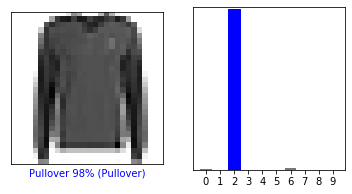

In [47]:
# print(class_names[train_labels[6235]])
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(6235, predictions_tr[6235], train_labels, train_images_pp, class_names)
plt.subplot(1,2,2)
plot_value_array(6235, predictions_tr[6235],  train_labels)
plt.show()

In [50]:
tr_img_6235_backup = train_images_pp[6235]
tr_img_6235_backup2 = train_images_pp[6235]
print(tr_img_6235_backup.flags)
# tr_img_6235_backup.setflags(write=1)

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False


In [83]:
train_images_pp = train_images / 255.0
# test_images_pp = test_images / 255.0

noise_factor = .1
for i in range(28):
    for j in range(28):
        x = ((random.randint(0, 256)) / 255.0)
        train_images_pp[6235, i, j] = train_images_pp[6235, i, j] + (noise_factor * x)
#         if (train_images_pp[6235, i, j] > 1):
#             train_images_pp[6235, i, j] = 1

In [51]:
tr_img_6235_backup[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.09803922, 0.43529412, 0.34509804, 0.        , 0.        ,
       0.        , 0.2745098 , 0.63921569, 0.30588235, 0.05098039,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

In [78]:
train_images[6235,0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  25, 111,  88,
         0,   0,   0,  70, 163,  78,  13,   0,   0,   0,   0,   0,   0,
         0,   0], dtype=uint8)

In [79]:
train_images_pp[6235,0]

array([4.50980392e-03, 7.33333333e-03, 9.96078431e-03, 7.05882353e-03,
       4.98039216e-03, 4.39215686e-03, 4.98039216e-03, 2.11764706e-03,
       3.92156863e-05, 9.52941176e-03, 1.04000000e-01, 4.35882353e-01,
       3.46470588e-01, 6.70588235e-03, 9.84313725e-03, 4.35294118e-03,
       2.80627451e-01, 6.48196078e-01, 3.12392157e-01, 5.32549020e-02,
       9.09803922e-03, 8.47058824e-03, 2.00000000e-03, 3.92156863e-03,
       6.03921569e-03, 4.50980392e-03, 2.35294118e-03, 8.11764706e-03])

In [84]:
# retrain
model.fit(train_images_pp, train_labels, epochs=1, verbose=0)

In [85]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions_tr = probability_model.predict(train_images_pp)
print(predictions_tr[6235])

[2.4604486e-04 4.8800086e-11 8.7856436e-01 8.6394493e-07 2.3714652e-04
 8.4931003e-12 1.2095165e-01 1.0845862e-19 3.6964529e-08 5.2699692e-11]


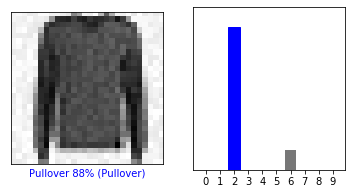

In [86]:
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(6235, predictions_tr[6235], train_labels, train_images_pp, class_names)
plt.subplot(1,2,2)
plot_value_array(6235, predictions_tr[6235],  train_labels)
plt.show()

Item number:  297
Noise factor:  0


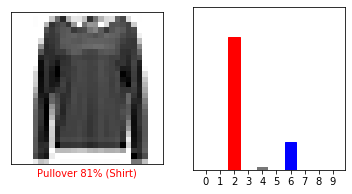

KeyboardInterrupt: 

In [12]:
for item_no in [297, 526, 549, 595, 55, 228, 580, 612, 24, 242, 481, 545]:
    print("Item number: ", item_no)
    for noise_factor in [0, 0.1, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75]:
        # reset training data for controlled alteration
        train_images_pp = train_images / 255.0

        # alter training data
        for i in range(28):
            for j in range(28):
                x = ((random.randint(0, 255)) / 255.0)
                y = random.randint(0,1)
                if (y == 1):
                    train_images_pp[item_no, i, j] = train_images_pp[item_no, i, j] + (noise_factor * x)
                else:
                    train_images_pp[item_no, i, j] = train_images_pp[item_no, i, j] - (noise_factor * x)
    #             if (train_images_pp[item_no, i, j] < 0):
    #                 train_images_pp[item_no, i, j] = 0

        # retrain model on altered data
        model.fit(train_images_pp, train_labels, epochs=1, verbose=0)

        # make the prediction
        probability_model = tf.keras.Sequential([model, 
                                             tf.keras.layers.Softmax()])
        predictions_tr = probability_model.predict(train_images_pp)

        # output result
        print("Noise factor: ", noise_factor)
        plt.figure(figsize=(6,3))
        plt.subplot(1,2,1)
        plot_image(item_no, predictions_tr[item_no], train_labels, train_images_pp, class_names)
        plt.subplot(1,2,2)
        plot_value_array(item_no, predictions_tr[item_no],  train_labels)
        plt.show()

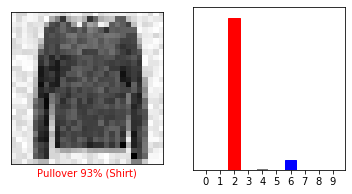

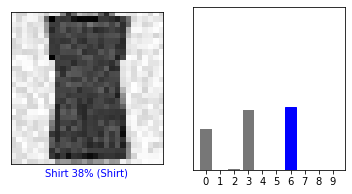

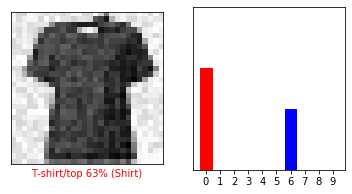

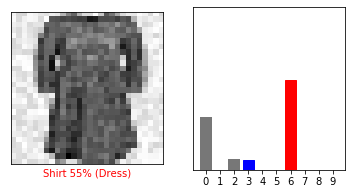

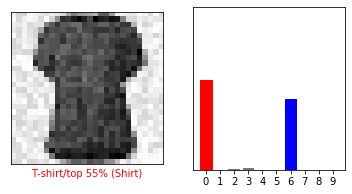

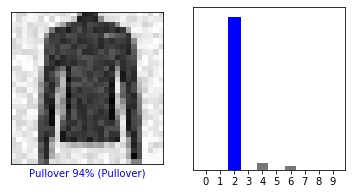

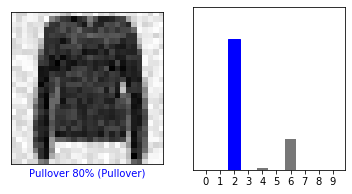

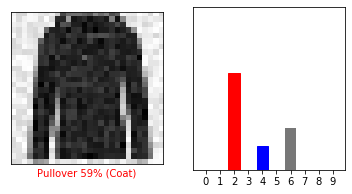

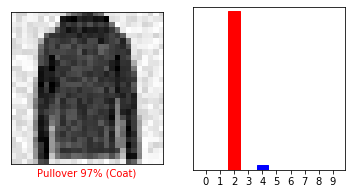

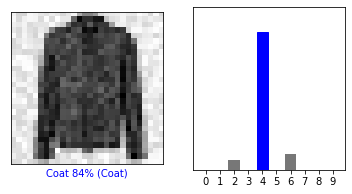

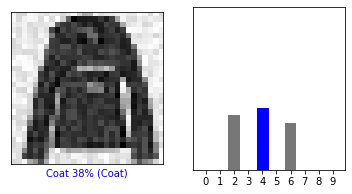

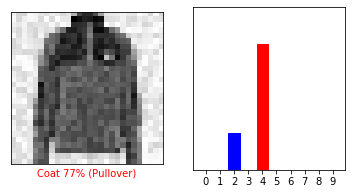

In [17]:
noise_factor = 0.1
train_images_pp = train_images / 255.0

x_list = []
new_row1 = []
new_row2 = []
y_list = []
for i in range(28):
    for j in range(28):
        new_row1.append(((random.randint(0, 255)) / 255.0))
        new_row2.append(random.randint(0,1))
    x_list.append(new_row1)
    y_list.append(new_row2)
    new_row1 = []
    new_row2 = []
    
for item_no in [297, 526, 549, 595, 55, 228, 580, 612, 24, 242, 481, 545]:
    for i in range(28):
        for j in range(28):
            if (y_list[i][j] == 1):
                train_images_pp[item_no, i, j] = train_images_pp[item_no, i, j] + (noise_factor * x_list[i][j])
            else:
                train_images_pp[item_no, i, j] = train_images_pp[item_no, i, j] - (noise_factor * x_list[i][j])


model.fit(train_images_pp, train_labels, epochs=1, verbose=0)
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions_tr = probability_model.predict(train_images_pp)

for item_no in [297, 526, 549, 595, 55, 228, 580, 612, 24, 242, 481, 545]:
#     print(item_no)
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(item_no, predictions_tr[item_no], train_labels, train_images_pp, class_names)
    plt.subplot(1,2,2)
    plot_value_array(item_no, predictions_tr[item_no],  train_labels)
    plt.show()

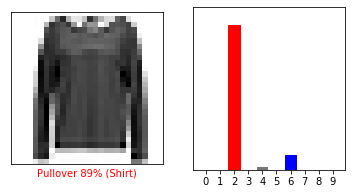

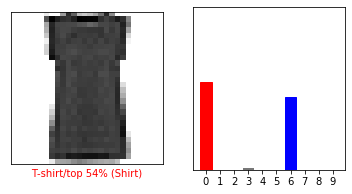

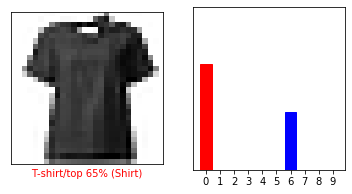

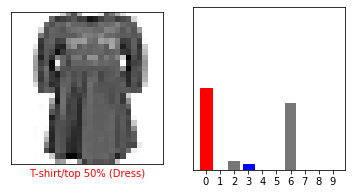

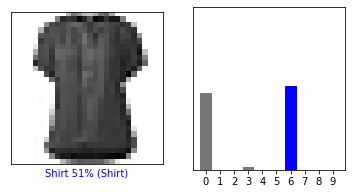

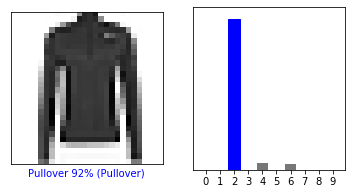

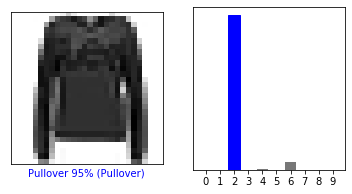

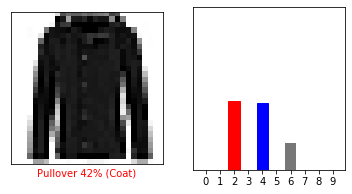

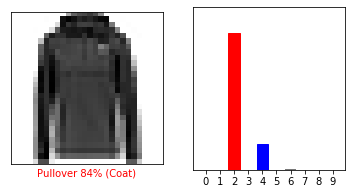

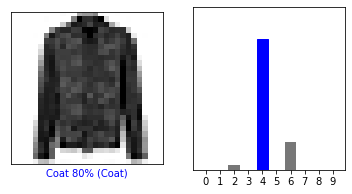

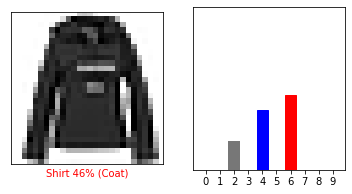

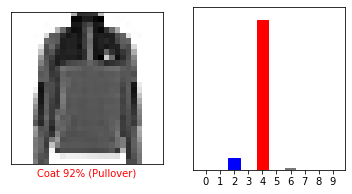

In [21]:
noise_factor = 0
train_images_pp = train_images / 255.0

x_list = []
new_row1 = []
new_row2 = []
y_list = []
for i in range(28):
    for j in range(28):
        new_row1.append(((random.randint(0, 255)) / 255.0))
        new_row2.append(random.randint(0,1))
    x_list.append(new_row1)
    y_list.append(new_row2)
    new_row1 = []
    new_row2 = []
    
for item_no in [297, 526, 549, 595, 55, 228, 580, 612, 24, 242, 481, 545]:
    for i in range(28):
        for j in range(28):
            if (y_list[i][j] == 1):
                train_images_pp[item_no, i, j] = train_images_pp[item_no, i, j] + (noise_factor * x_list[i][j])
            else:
                train_images_pp[item_no, i, j] = train_images_pp[item_no, i, j] - (noise_factor * x_list[i][j])


model.fit(train_images_pp, train_labels, epochs=1, verbose=0)
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions_tr = probability_model.predict(train_images_pp)

for item_no in [297, 526, 549, 595, 55, 228, 580, 612, 24, 242, 481, 545]:
#     print(item_no)
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(item_no, predictions_tr[item_no], train_labels, train_images_pp, class_names)
    plt.subplot(1,2,2)
    plot_value_array(item_no, predictions_tr[item_no],  train_labels)
    plt.show()

Noise factor:  0


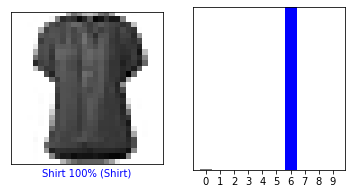

Noise factor:  0.1


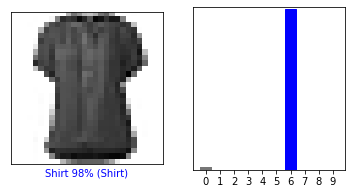

Noise factor:  0.5


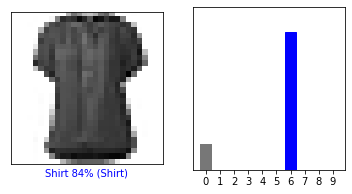

Noise factor:  0.75


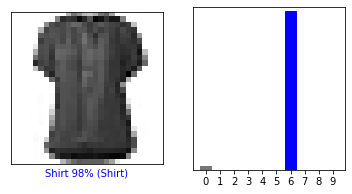

Noise factor:  1.0


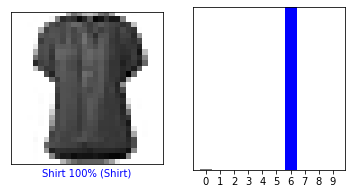

Noise factor:  1.25


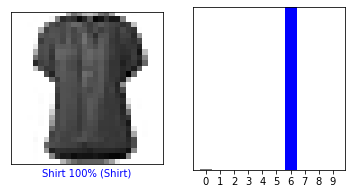

In [20]:
item_no = 55
for noise_factor in [0, 0.1, 0.5, 0.75, 1.0, 1.25]:
    # reset training data for controlled alteration
    train_images_pp = train_images / 255.0
#     noise_factor = 0.5
    # alter training data
    for i in range(28):
        for j in range(28):
            if (train_images_pp[item_no, i, j] > 10):
                x = ((random.randint(0, 255)) / 255.0)
                y = random.randint(0,1)
                if (y == 1):
                    train_images_pp[item_no, i, j] = train_images_pp[item_no, i, j] + (noise_factor * x)
                else:
                    train_images_pp[item_no, i, j] = train_images_pp[item_no, i, j] - (noise_factor * x)
    #                 if (train_images_pp[item_no, i, j] < 0):
    #                     train_images_pp[item_no, i, j] = 0

    # retrain model on altered data
    model.fit(train_images_pp, train_labels, epochs=1, verbose=0)

    # make the prediction
    probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
    predictions_tr = probability_model.predict(train_images_pp)

    # output result
    print("Noise factor: ", noise_factor)
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(item_no, predictions_tr[item_no], train_labels, train_images_pp, class_names)
    plt.subplot(1,2,2)
    plot_value_array(item_no, predictions_tr[item_no],  train_labels)
    plt.show()

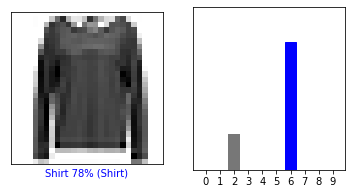

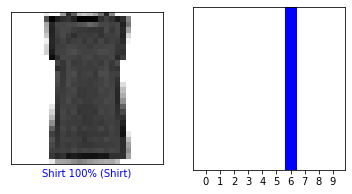

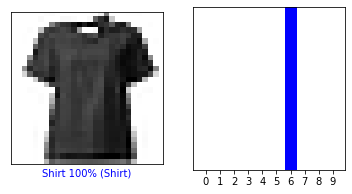

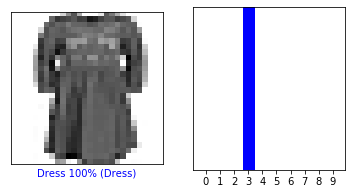

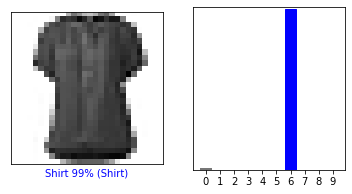

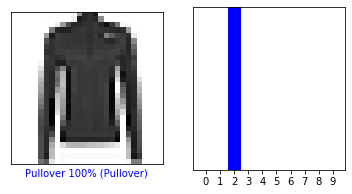

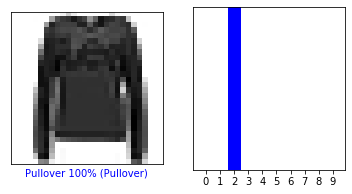

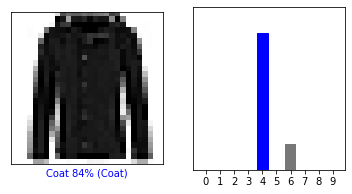

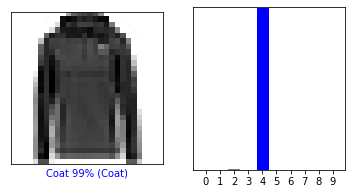

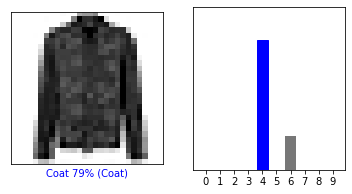

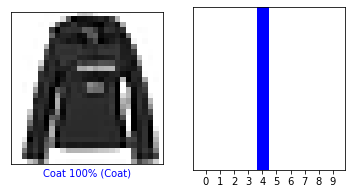

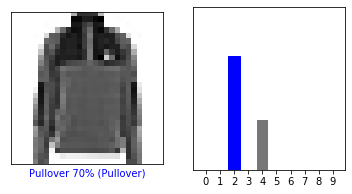

In [33]:
for item_no in [297, 526, 549, 595, 55, 228, 580, 612, 24, 242, 481, 545]:
#     print("Item number: ", item_no)
#     for noise_factor in [0, 0.1, 0.5, 0.75, 1.0, 1.25]:
        # reset training data for controlled alteration
    noise_factor = 1.0 
        # indent starting here 
    train_images_pp = train_images / 255.0
#         noise_factor = 0.5
    # alter training data
    for i in range(28):
        for j in range(28):
            if (train_images_pp[item_no, i, j] > 10):
                x = ((random.randint(0, 255)) / 255.0)
                y = random.randint(0,1)
                if (y == 1):
                    train_images_pp[item_no, i, j] = train_images_pp[item_no, i, j] + (noise_factor * x)
                else:
                    train_images_pp[item_no, i, j] = train_images_pp[item_no, i, j] - (noise_factor * x)
    #                 if (train_images_pp[item_no, i, j] < 0):
    #                     train_images_pp[item_no, i, j] = 0

    # retrain model on altered data
    model.fit(train_images_pp, train_labels, epochs=1, verbose=0)

    # make the prediction
    probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
    predictions_tr = probability_model.predict(train_images_pp)

    # output result
#     print("Noise factor: ", noise_factor)
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(item_no, predictions_tr[item_no], train_labels, train_images_pp, class_names)
    plt.subplot(1,2,2)
    plot_value_array(item_no, predictions_tr[item_no],  train_labels)
    plt.show()

Item number:  297
Noise factor:  0


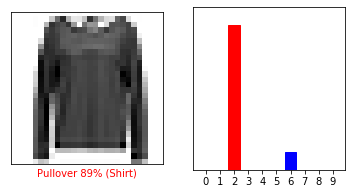

Item number:  526
Noise factor:  0


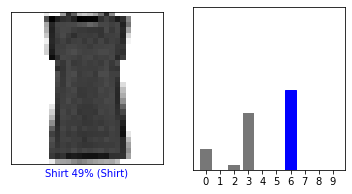

Item number:  549
Noise factor:  0


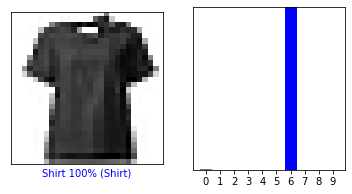

Item number:  595
Noise factor:  0


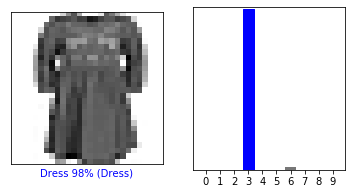

Item number:  55
Noise factor:  0


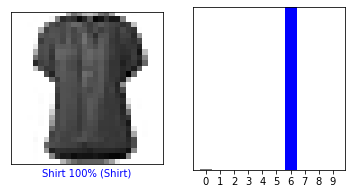

Item number:  228
Noise factor:  0


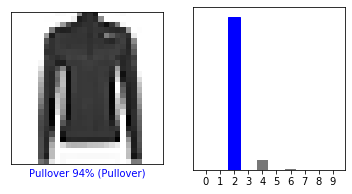

Item number:  580
Noise factor:  0


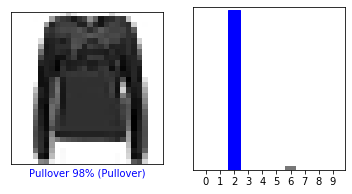

Item number:  612
Noise factor:  0


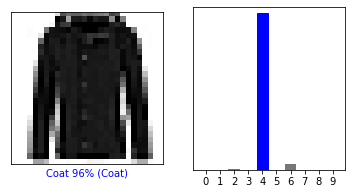

Item number:  24
Noise factor:  0


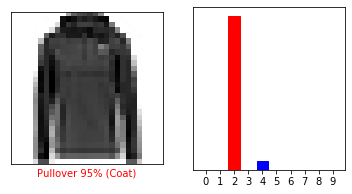

Item number:  242
Noise factor:  0


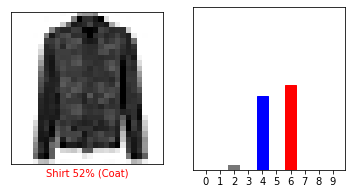

Item number:  481
Noise factor:  0


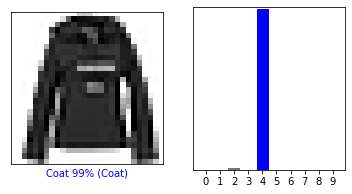

Item number:  545
Noise factor:  0


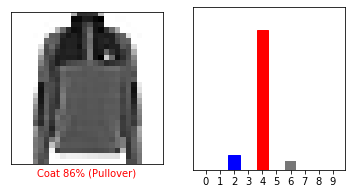

In [16]:
for item_no in [297, 526, 549, 595, 55, 228, 580, 612, 24, 242, 481, 545]:
    print("Item number: ", item_no)
#     for noise_factor in [0, 0.1, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75]:
        # reset training data for controlled alteration
        
    # indent starting here 
    train_images_pp = train_images / 255.0
    noise_factor = 0
    # alter training data
    for i in range(28):
        for j in range(28):
            if (train_images_pp[item_no, i, j] > 40):
                x = ((random.randint(0, 255)) / 255.0)
                y = random.randint(0,1)
                if (y == 1):
                    train_images_pp[item_no, i, j] = train_images_pp[item_no, i, j] + (noise_factor * x)
                else:
                    train_images_pp[item_no, i, j] = train_images_pp[item_no, i, j] - (noise_factor * x)
#                 if (train_images_pp[item_no, i, j] < 0):
#                     train_images_pp[item_no, i, j] = 0

    # retrain model on altered data
    model.fit(train_images_pp, train_labels, epochs=1, verbose=0)

    # make the prediction
    probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
    predictions_tr = probability_model.predict(train_images_pp)

    # output result
    print("Noise factor: ", noise_factor)
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(item_no, predictions_tr[item_no], train_labels, train_images_pp, class_names)
    plt.subplot(1,2,2)
    plot_value_array(item_no, predictions_tr[item_no],  train_labels)
    plt.show()

Item number:  297
Noise factor:  0


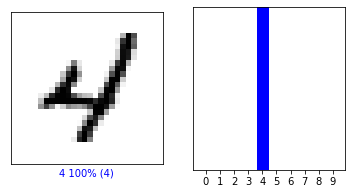

Noise factor:  0.1


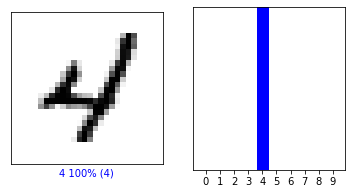

Noise factor:  0.5


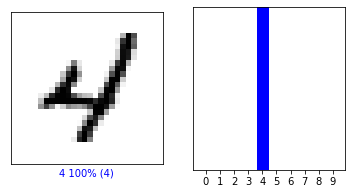

Noise factor:  0.75


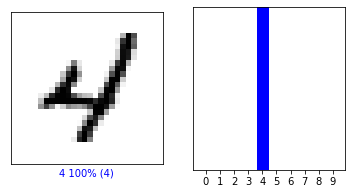

Noise factor:  1.0


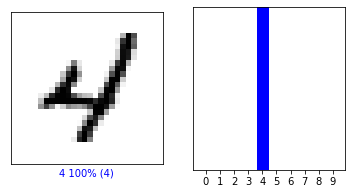

Noise factor:  1.25


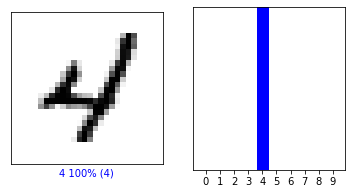

Noise factor:  1.5


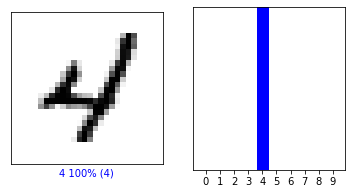

Noise factor:  1.75


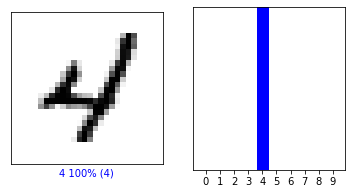

In [94]:
# og mnist set

for item_no in [297]:#, 526, 549, 595, 55, 228, 580, 612, 24, 242, 481, 545]:
    print("Item number: ", item_no)
    for noise_factor in [0, 0.1, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75]:
        # reset training data for controlled alteration
        
    # indent starting here 
        og_train_images_pp = og_train_images / 255.0
#         noise_factor = 1.0
        # alter training data
        for i in range(28):
            for j in range(28):
                if (og_train_images_pp[item_no, i, j] > 40):
                    x = ((random.randint(0, 255)) / 255.0)
                    y = random.randint(0,1)
                    if (y == 1):
                        og_train_images_pp[item_no, i, j] = og_train_images_pp[item_no, i, j] + (noise_factor * x)
                    else:
                        og_train_images_pp[item_no, i, j] = og_train_images_pp[item_no, i, j] - (noise_factor * x)
    #                 if (train_images_pp[item_no, i, j] < 0):
    #                     train_images_pp[item_no, i, j] = 0

        # retrain model on altered data
        og_model.fit(og_train_images_pp, og_train_labels, epochs=1, verbose=0)

        # make the prediction
        probability_model = tf.keras.Sequential([og_model, 
                                             tf.keras.layers.Softmax()])
        predictions_tr = probability_model.predict(og_train_images_pp)

        # output result
        print("Noise factor: ", noise_factor)
        plt.figure(figsize=(6,3))
        plt.subplot(1,2,1)
        plot_image(item_no, predictions_tr[item_no], og_train_labels, og_train_images_pp, og_class_names)
        plt.subplot(1,2,2)
        plot_value_array(item_no, predictions_tr[item_no],  og_train_labels)
        plt.show()

In [26]:
kannad_mnist = np.genfromtxt('Kannada-MNIST/train.csv', delimiter=',')

In [33]:
kannad_mnist.shape

(60001, 785)

In [83]:
kannad_test = np.genfromtxt('Kannada-MNIST/test.csv', delimiter=',')

In [59]:
km_train_images = []
km_train_labels = []
new_image_row = []
new_image = []

row = 0
col = 0
for sample_no in range(60001):
    if (sample_no != 0):
        for i in range(785):
            if (i == 0):
                km_train_labels.append((int)(kannad_mnist[sample_no][i]))
            else:
                if (col < 28):
                    new_image_row.append(kannad_mnist[sample_no][i])
                else:
                    new_image.append(new_image_row)
                    col = 0
                    row = row+1
                    new_image_row = []
                    new_image_row.append(kannad_mnist[sample_no][i])
                col = col+1
        new_image.append(new_image_row)
        km_train_images.append(new_image)
        new_image_row = []
        new_image = []
        row = 0
        col = 0
km_train_images = np.array(km_train_images)
km_train_labels = np.array(km_train_labels)

In [87]:
km_test_images = []
new_image_row = []
new_image = []

row = 0
col = 0
for sample_no in range(5000):
    if (sample_no != 0):
        for i in range(785):
            if (i != 0):
                if (col < 28):
                    new_image_row.append(kannad_test[sample_no][i])
                else:
                    new_image.append(new_image_row)
                    col = 0
                    row = row+1
                    new_image_row = []
                    new_image_row.append(kannad_test[sample_no][i])
                col = col+1
        new_image.append(new_image_row)
        km_test_images.append(new_image)
        new_image_row = []
        new_image = []
        row = 0
        col = 0
km_test_images = np.array(km_test_images)

In [56]:
km_train_images_pp = km_train_images / 255.0
km_train_images.shape

(60000, 28, 28)

In [88]:
km_test_images_pp = km_test_images / 255.0
km_test_images_pp.shape

(4999, 28, 28)

In [57]:
km_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])
km_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
km_model.fit(km_train_images_pp, km_train_labels, epochs=10, verbose=0)

# print('\n')
# test_loss, test_acc = og_model.evaluate(og_test_images_pp,  og_test_labels, verbose=2)

# print('\nTest accuracy:', test_acc)

Item number:  297
Noise factor:  0


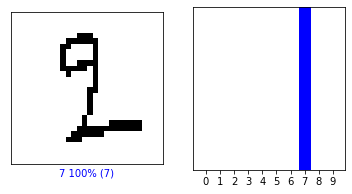

Noise factor:  0.1


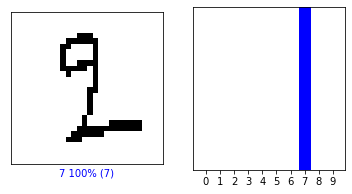

Noise factor:  0.5


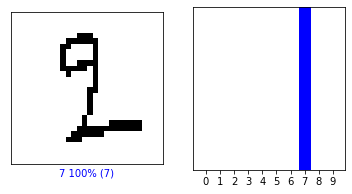

Noise factor:  0.75


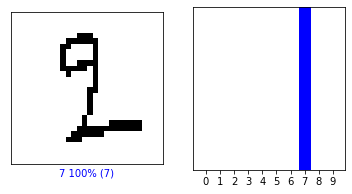

Noise factor:  1.0


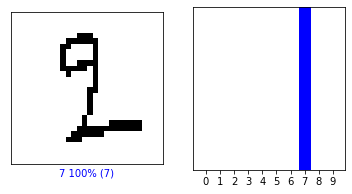

Noise factor:  1.25


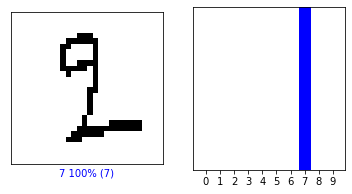

In [93]:
# kannada mnist set

for item_no in [297]:#, 526, 549, 595, 55, 228, 580, 612, 24, 242, 481, 545]:
    print("Item number: ", item_no)
    for noise_factor in [0, 0.1, 0.5, 0.75, 1.0, 1.25]:
        # reset training data for controlled alteration
        
    # indent starting here 
        km_train_images_pp = km_train_images / 255.0
    #     noise_factor = 1.0
        # alter training data
        for i in range(28):
            for j in range(28):
                if (km_train_images_pp[item_no, i, j] > 40):
                    x = ((random.randint(0, 255)) / 255.0)
                    y = random.randint(0,1)
                    if (y == 1):
                        km_train_images_pp[item_no, i, j] = km_train_images_pp[item_no, i, j] + (noise_factor * x)
                    else:
                        km_train_images_pp[item_no, i, j] = km_train_images_pp[item_no, i, j] - (noise_factor * x)
    #                 if (train_images_pp[item_no, i, j] < 0):
    #                     train_images_pp[item_no, i, j] = 0

        # retrain model on altered data
        km_model.fit(km_train_images_pp, km_train_labels, epochs=1, verbose=0)

        # make the prediction
        probability_model = tf.keras.Sequential([km_model, 
                                             tf.keras.layers.Softmax()])
        predictions_tr = probability_model.predict(km_train_images_pp)

        # output result
        print("Noise factor: ", noise_factor)
        plt.figure(figsize=(6,3))
        plt.subplot(1,2,1)
        plot_image(item_no, predictions_tr[item_no], km_train_labels, km_train_images_pp, og_class_names)
        plt.subplot(1,2,2)
        plot_value_array(item_no, predictions_tr[item_no],  km_train_labels)
        plt.show()

In [80]:
km_train_images_pp = km_train_images / 255.0
km_model.fit(km_train_images_pp, km_train_labels, epochs=1, verbose=0)

km_item_list = []

# make the prediction
probability_model = tf.keras.Sequential([km_model, 
                                     tf.keras.layers.Softmax()])
predictions_tr = probability_model.predict(km_train_images_pp)
for item_no in range(60000):
    if (max(predictions_tr[item_no]) != 1.0):
        km_item_list.append(item_no)
km_item_list = np.array(km_item_list)

In [81]:
km_item_list.shape

(1955,)

In [82]:
for item_no in km_item_list:
    print(max(predictions_tr[item_no]))

0.9999913
0.9999999
0.9999999
0.9999993
0.9999994
0.9999999
0.99999726
0.999998
0.9999964
0.9999908
0.9999999
0.9999989
0.99999964
0.99999976
0.99999654
0.9999999
0.9999999
0.99999976
0.99999917
0.9999995
0.99997604
0.9999989
0.99999976
0.9999999
0.9999976
0.9999939
0.9999999
0.9999007
0.99999976
0.9999739
0.999998
0.9999876
0.99999654
0.9999989
0.99999833
0.99999523
0.99999976
0.99999976
0.9999999
0.99999964
0.9999883
0.99999976
0.9999999
0.9999999
0.99999964
0.9999999
0.9999927
0.99999857
0.9999994
0.9999999
0.9999422
0.9999889
0.9999999
0.9999857
0.9999999
0.99998736
0.9999999
0.9999609
0.9999994
0.99999845
0.99995995
0.9999976
0.99999785
0.9999918
0.99999976
0.9999982
0.99999475
0.99999917
0.9999914
0.99999976
0.9999999
0.9999082
0.9999703
0.99999976
0.99999917
0.99999654
0.9999987
0.9999999
0.99999285
0.99999976
0.99999785
0.99970716
0.9999999
0.9999517
0.9999622
0.9999713
0.9999994
0.99999917
0.99999917
0.99997914
0.999974
0.9999753
0.9999994
0.99999976
0.9999994
0.99999595
0.999

0.9999999
0.9999989
0.99999917
0.99995553
0.9999974
0.99998665
0.99999976
0.9999999
0.9999335
0.99999905
0.9997353
0.9999666
0.9999999
0.9999999
0.9999516
0.9999999
0.999998
0.99999976
0.99999666
0.9999999
0.99999976
0.99997497
0.9999559
0.99999976
0.9999999
0.9999999
0.9999833
0.9999999
0.9998599
0.99999917
0.9999888
0.99999523
0.9999815
0.9999999
0.9999974
0.9999999
0.99969137
0.9999999
0.99999976
0.999998
0.9999999
0.9999988
0.9999994
0.99999785
0.9999995
0.9999999
0.9999999
0.9999999
0.9999962
0.9999993
0.99999905
0.99999976
0.9999634
0.9999999
0.99999976
0.9999182
0.99999154
0.9999995
0.99999714
0.9999999
0.9999957
0.999998
0.9999999
0.99999976
0.9997986
0.9999999
0.99999964
0.99983215
0.99997234
0.99999416
0.9999987
0.9999896
0.99999976
0.99999976
0.99999917
0.99999607
0.9999999
0.9999999
0.99999964
0.99999416
0.9999534
0.99994636
0.99999964
0.9999999
0.99999976
0.999998
0.99972814
0.9999999
0.99999964
0.99999964
0.999998
0.9999995
0.99999905
0.9999975
0.9999981
0.9999999
0.99999